In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = "census_data_cleaned.csv"

# Read in the census data
census_df = pd.read_csv(file_path)
census_df.head()

,Name,median_household_income,total_population,median_age,per_capita,median_gross_rent,median_home_value,education_none,education_high_school,education_ged,education_associates,education_bachelors,education_masters,education_professional,education_doctorate,state,zipcode,year
0,ZCTA5 00601,17113.0,14361.0,41.9,7493.0,383.0,83900.0,455.0,2952.0,199.0,1141.0,1729.0,155.0,30.0,46.0,72,601,2019
1,ZCTA5 00602,37751.0,16807.0,42.9,9694.0,400.0,85300.0,822.0,6127.0,797.0,2971.0,4001.0,1124.0,134.0,260.0,72,602,2019
2,ZCTA5 00603,47081.0,16049.0,42.1,11259.0,433.0,118400.0,804.0,8788.0,984.0,2525.0,5561.0,1580.0,342.0,223.0,72,603,2019
3,ZCTA5 00606,6392.0,12119.0,44.3,6093.0,275.0,80800.0,236.0,1303.0,154.0,204.0,231.0,116.0,0.0,0.0,72,606,2019
4,ZCTA5 00610,26686.0,19898.0,42.7,10572.0,427.0,87600.0,744.0,5138.0,596.0,2132.0,2799.0,649.0,47.0,63.0,72,610,2019


In [3]:
census_df.columns

Index(['Name', 'median_household_income', 'total_population', 'median_age',
       'per_capita', 'median_gross_rent', 'median_home_value',
       'education_none', 'education_high_school', 'education_ged',
       'education_associates', 'education_bachelors', 'education_masters',
       'education_professional', 'education_doctorate', 'state', 'zipcode',
       'year'],
      dtype='object')

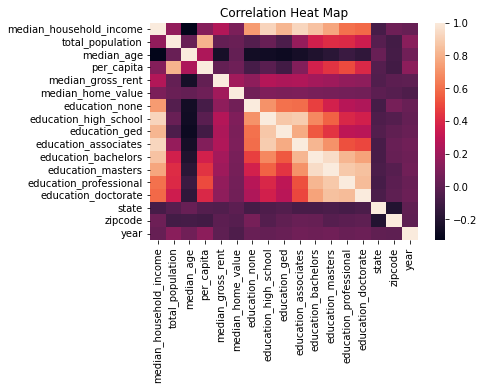

In [4]:
#correlation table
corrs =census_df.corr()
corrs

#show heatmap of correlation table above
sns.heatmap(corrs)
plt.title("Correlation Heat Map")
plt.show()

In [5]:
#create percentage rows for education levels
education=['education_none', 'education_high_school', 'education_ged',
      'education_associates', 'education_bachelors', 'education_masters',
      'education_professional', 'education_doctorate']
census_df2= census_df.copy()

for edu in education:
    
    census_df2[f"{edu}_perc"] = 100 * (census_df2[edu].astype(int) / census_df2["total_population"].astype(int))
    
census_df2.head()

,Name,median_household_income,total_population,median_age,per_capita,median_gross_rent,median_home_value,education_none,education_high_school,education_ged,...,zipcode,year,education_none_perc,education_high_school_perc,education_ged_perc,education_associates_perc,education_bachelors_perc,education_masters_perc,education_professional_perc,education_doctorate_perc
0,ZCTA5 00601,17113.0,14361.0,41.9,7493.0,383.0,83900.0,455.0,2952.0,199.0,...,601,2019,3.168303,20.555672,1.385697,7.945129,12.039552,1.079312,0.208899,0.320312
1,ZCTA5 00602,37751.0,16807.0,42.9,9694.0,400.0,85300.0,822.0,6127.0,797.0,...,602,2019,4.890819,36.455048,4.742072,17.677158,23.805557,6.687690,0.797287,1.546974
2,ZCTA5 00603,47081.0,16049.0,42.1,11259.0,433.0,118400.0,804.0,8788.0,984.0,...,603,2019,5.009658,54.757306,6.131223,15.733067,34.650134,9.844850,2.130974,1.389495
3,ZCTA5 00606,6392.0,12119.0,44.3,6093.0,275.0,80800.0,236.0,1303.0,154.0,...,606,2019,1.947355,10.751712,1.270732,1.683307,1.906098,0.957175,0.000000,0.000000
4,ZCTA5 00610,26686.0,19898.0,42.7,10572.0,427.0,87600.0,744.0,5138.0,596.0,...,610,2019,3.739069,25.821691,2.995276,10.714645,14.066740,3.261634,0.236205,0.316615


In [6]:
#pull only 2015 data
mask=census_df2.year == 2015
census15_org= census_df2.loc[mask]
census15_org

,Name,median_household_income,total_population,median_age,per_capita,median_gross_rent,median_home_value,education_none,education_high_school,education_ged,...,zipcode,year,education_none_perc,education_high_school_perc,education_ged_perc,education_associates_perc,education_bachelors_perc,education_masters_perc,education_professional_perc,education_doctorate_perc
123780,ZCTA5 12810,724.0,57500.0,46.5,25551.0,675.0,116200.0,17.0,169.0,66.0,...,12810,2015,0.029565,0.293913,0.114783,0.083478,0.048696,0.033043,0.000000,0.000000
123781,ZCTA5 12812,58.0,49583.0,64.1,23600.0,-666666666.0,122500.0,0.0,20.0,0.0,...,12812,2015,0.000000,0.040336,0.000000,0.002017,0.020168,0.004034,0.000000,0.000000
123782,ZCTA5 12814,1282.0,58176.0,46.4,35508.0,920.0,317100.0,0.0,269.0,15.0,...,12814,2015,0.000000,0.462390,0.025784,0.113449,0.524271,0.173611,0.010314,0.010314
123783,ZCTA5 12815,1103.0,60458.0,54.2,30685.0,698.0,227300.0,8.0,215.0,44.0,...,12815,2015,0.013232,0.355619,0.072778,0.181944,0.191869,0.172020,0.014886,0.000000
123784,ZCTA5 12816,4417.0,50417.0,46.9,26988.0,794.0,165600.0,20.0,946.0,145.0,...,12816,2015,0.039669,1.876351,0.287601,0.595037,1.039332,0.755697,0.138842,0.087272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154842,ZCTA5 57772,2201.0,22759.0,25.4,7810.0,431.0,17800.0,0.0,213.0,80.0,...,57772,2015,0.000000,0.935893,0.351509,0.333934,0.588778,0.105453,0.000000,0.000000
154843,ZCTA5 57773,330.0,90625.0,40.0,34238.0,536.0,246900.0,0.0,60.0,11.0,...,57773,2015,0.000000,0.066207,0.012138,0.030897,0.102621,0.000000,0.000000,0.022069
154844,ZCTA5 57775,280.0,71250.0,36.0,24657.0,-666666666.0,100900.0,0.0,91.0,7.0,...,57775,2015,0.000000,0.127719,0.009825,0.005614,0.063158,0.000000,0.001404,0.000000
154845,ZCTA5 57779,158.0,39792.0,61.7,26141.0,-666666666.0,82500.0,0.0,53.0,0.0,...,57779,2015,0.000000,0.133193,0.000000,0.032670,0.140732,0.000000,0.000000,0.000000


In [7]:
#create new data frame with essential columns

census15 = census15_org[['Name', 'median_household_income', 'total_population', 'median_age',
       'per_capita', 'education_none', 'education_high_school', 'education_ged',
       'education_associates', 'education_bachelors', 'education_masters',
       'education_professional', 'education_doctorate', 'state', 'zipcode',
       'year', 'education_none_perc', 'education_high_school_perc',
       'education_ged_perc', 'education_associates_perc',
       'education_bachelors_perc', 'education_masters_perc',
       'education_professional_perc', 'education_doctorate_perc']]
census15

,Name,median_household_income,total_population,median_age,per_capita,education_none,education_high_school,education_ged,education_associates,education_bachelors,...,zipcode,year,education_none_perc,education_high_school_perc,education_ged_perc,education_associates_perc,education_bachelors_perc,education_masters_perc,education_professional_perc,education_doctorate_perc
123780,ZCTA5 12810,724.0,57500.0,46.5,25551.0,17.0,169.0,66.0,48.0,28.0,...,12810,2015,0.029565,0.293913,0.114783,0.083478,0.048696,0.033043,0.000000,0.000000
123781,ZCTA5 12812,58.0,49583.0,64.1,23600.0,0.0,20.0,0.0,1.0,10.0,...,12812,2015,0.000000,0.040336,0.000000,0.002017,0.020168,0.004034,0.000000,0.000000
123782,ZCTA5 12814,1282.0,58176.0,46.4,35508.0,0.0,269.0,15.0,66.0,305.0,...,12814,2015,0.000000,0.462390,0.025784,0.113449,0.524271,0.173611,0.010314,0.010314
123783,ZCTA5 12815,1103.0,60458.0,54.2,30685.0,8.0,215.0,44.0,110.0,116.0,...,12815,2015,0.013232,0.355619,0.072778,0.181944,0.191869,0.172020,0.014886,0.000000
123784,ZCTA5 12816,4417.0,50417.0,46.9,26988.0,20.0,946.0,145.0,300.0,524.0,...,12816,2015,0.039669,1.876351,0.287601,0.595037,1.039332,0.755697,0.138842,0.087272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154842,ZCTA5 57772,2201.0,22759.0,25.4,7810.0,0.0,213.0,80.0,76.0,134.0,...,57772,2015,0.000000,0.935893,0.351509,0.333934,0.588778,0.105453,0.000000,0.000000
154843,ZCTA5 57773,330.0,90625.0,40.0,34238.0,0.0,60.0,11.0,28.0,93.0,...,57773,2015,0.000000,0.066207,0.012138,0.030897,0.102621,0.000000,0.000000,0.022069
154844,ZCTA5 57775,280.0,71250.0,36.0,24657.0,0.0,91.0,7.0,4.0,45.0,...,57775,2015,0.000000,0.127719,0.009825,0.005614,0.063158,0.000000,0.001404,0.000000
154845,ZCTA5 57779,158.0,39792.0,61.7,26141.0,0.0,53.0,0.0,13.0,56.0,...,57779,2015,0.000000,0.133193,0.000000,0.032670,0.140732,0.000000,0.000000,0.000000


In [8]:
census15.columns

Index(['Name', 'median_household_income', 'total_population', 'median_age',
       'per_capita', 'education_none', 'education_high_school',
       'education_ged', 'education_associates', 'education_bachelors',
       'education_masters', 'education_professional', 'education_doctorate',
       'state', 'zipcode', 'year', 'education_none_perc',
       'education_high_school_perc', 'education_ged_perc',
       'education_associates_perc', 'education_bachelors_perc',
       'education_masters_perc', 'education_professional_perc',
       'education_doctorate_perc'],
      dtype='object')

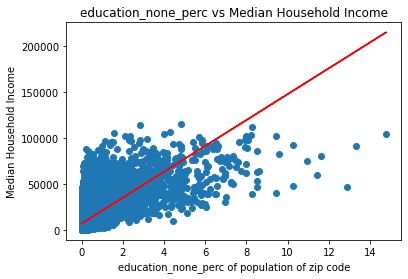

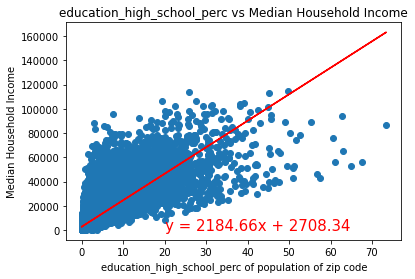

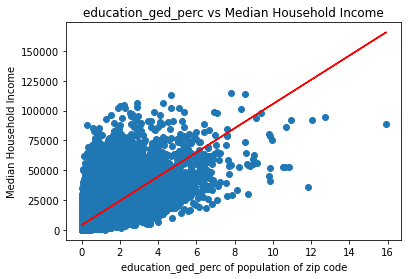

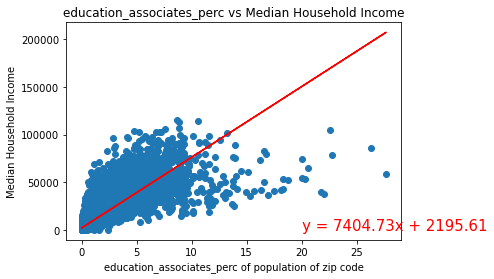

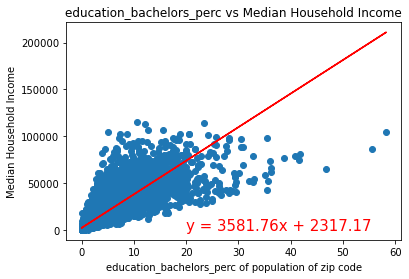

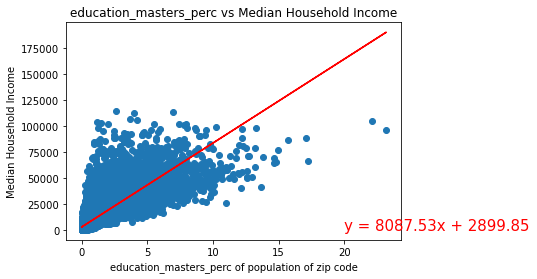

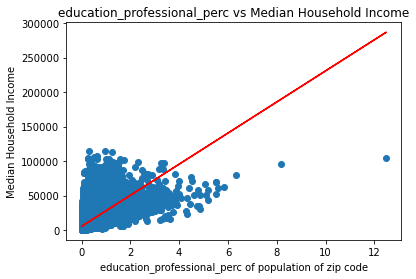

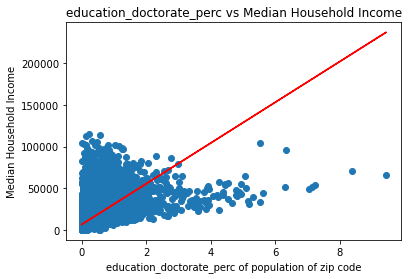

In [9]:
#create linear regression between median household income and education level for all zipcodes

from scipy.stats import linregress

percentages= ['education_none_perc', 'education_high_school_perc',
       'education_ged_perc', 'education_associates_perc',
       'education_bachelors_perc', 'education_masters_perc',
       'education_professional_perc', 'education_doctorate_perc']

for perc in percentages:
   
    # Add the linear regression equation and line to plot
    x_values = census15[perc]
    y_values = census15["median_household_income"]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(20,37),fontsize=15,color="red")
    plt.xlabel(f"{perc} of population of zip code")
    plt.ylabel('Median Household Income')
    plt.title(f'{perc} vs Median Household Income')
    plt.show()

In [10]:
#save 2015 data to csv
census15.to_csv("census15.csv", encoding="utf-8", index=False)